In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
import pickle
import utils
# from keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD
from keras.utils.vis_utils import plot_model
np.random.seed(42)

In [2]:
# Setting Custom function for saving figures and getting data
import importlib
importlib.reload(utils)

<module 'utils' from '/home/abhishek/Desktop/sign-language-classifier/utils.py'>

In [3]:
X_train, y_train, X_test, y_test = utils.load_dataset()

In [4]:
# Convert categorical data to encoded dummy variable Numpy array
label_binrizer = LabelBinarizer()
y_train = label_binrizer.fit_transform(y_train)
y_test = label_binrizer.fit_transform(y_test)

In [5]:
# Splitting train data into train and validation
#X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size = 0.3, random_state = 101)

In [6]:
# Setting up validation on test data
X_dev = X_test
y_dev = y_test

In [7]:
test_data = X_test
test_labels = y_test
test_labels = label_binrizer.fit_transform(test_labels)
test_images = test_data.reshape(test_data.shape[0], 28, 28, 1)

# Neural Network

In [8]:
# Basic setup for models
batch_size = 32
num_classes = 24 # J and Z are missing
epochs = 150

In [9]:
# Create model using Keras APIs
model = Sequential()
model.add(Dense(units=128,activation="relu",input_shape=(784,)))
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=num_classes,activation="softmax"))

In [10]:
# Compile and train the model
model.compile(optimizer=SGD(0.001),loss="categorical_crossentropy",metrics=["accuracy"])
history = model.fit(X_train,y_train, validation_data=(X_test, y_test),batch_size=batch_size,epochs=epochs,verbose=1)

Epoch 1/150
858/858 [==============================] - 2s 2ms/step - loss: 3.1626 - accuracy: 0.0536 - val_loss: 3.1465 - val_accuracy: 0.0704
Epoch 2/150
858/858 [==============================] - 2s 2ms/step - loss: 3.1069 - accuracy: 0.1142 - val_loss: 3.1021 - val_accuracy: 0.1458
Epoch 3/150
858/858 [==============================] - 1s 2ms/step - loss: 3.0545 - accuracy: 0.1718 - val_loss: 3.0444 - val_accuracy: 0.1701
Epoch 4/150
858/858 [==============================] - 2s 2ms/step - loss: 2.9872 - accuracy: 0.2235 - val_loss: 2.9744 - val_accuracy: 0.2143
Epoch 5/150
858/858 [==============================] - 1s 1ms/step - loss: 2.8960 - accuracy: 0.2531 - val_loss: 2.8731 - val_accuracy: 0.2588
Epoch 6/150
858/858 [==============================] - 1s 2ms/step - loss: 2.7783 - accuracy: 0.2801 - val_loss: 2.7457 - val_accuracy: 0.2829
Epoch 7/150
858/858 [==============================] - 1s 2ms/step - loss: 2.6406 - accuracy: 0.3069 - val_loss: 2.6124 - val_accuracy: 0.3253

Epoch 58/150
858/858 [==============================] - 2s 2ms/step - loss: 0.3945 - accuracy: 0.9017 - val_loss: 1.0970 - val_accuracy: 0.6682
Epoch 59/150
858/858 [==============================] - 2s 2ms/step - loss: 0.3808 - accuracy: 0.9062 - val_loss: 1.0907 - val_accuracy: 0.6721
Epoch 60/150
858/858 [==============================] - 1s 2ms/step - loss: 0.3702 - accuracy: 0.9102 - val_loss: 1.1061 - val_accuracy: 0.6778
Epoch 61/150
858/858 [==============================] - 2s 2ms/step - loss: 0.3576 - accuracy: 0.9127 - val_loss: 1.0666 - val_accuracy: 0.6781
Epoch 62/150
858/858 [==============================] - 1s 2ms/step - loss: 0.3464 - accuracy: 0.9169 - val_loss: 1.0701 - val_accuracy: 0.6875
Epoch 63/150
858/858 [==============================] - 1s 1ms/step - loss: 0.3342 - accuracy: 0.9220 - val_loss: 1.0798 - val_accuracy: 0.6719
Epoch 64/150
858/858 [==============================] - 1s 2ms/step - loss: 0.3236 - accuracy: 0.9248 - val_loss: 1.1019 - val_accuracy:

Epoch 115/150
858/858 [==============================] - 2s 2ms/step - loss: 0.0639 - accuracy: 0.9974 - val_loss: 1.2897 - val_accuracy: 0.7107
Epoch 116/150
858/858 [==============================] - 1s 2ms/step - loss: 0.0618 - accuracy: 0.9977 - val_loss: 1.3151 - val_accuracy: 0.7040
Epoch 117/150
858/858 [==============================] - 1s 2ms/step - loss: 0.0601 - accuracy: 0.9980 - val_loss: 1.3073 - val_accuracy: 0.7061
Epoch 118/150
858/858 [==============================] - 1s 1ms/step - loss: 0.0591 - accuracy: 0.9979 - val_loss: 1.3135 - val_accuracy: 0.7182
Epoch 119/150
858/858 [==============================] - 2s 2ms/step - loss: 0.0575 - accuracy: 0.9980 - val_loss: 1.3323 - val_accuracy: 0.7082
Epoch 120/150
858/858 [==============================] - 1s 2ms/step - loss: 0.0562 - accuracy: 0.9980 - val_loss: 1.3179 - val_accuracy: 0.7090
Epoch 121/150
858/858 [==============================] - 2s 2ms/step - loss: 0.0545 - accuracy: 0.9983 - val_loss: 1.3309 - val_ac

225/225 [==============================] - 0s 595us/step
              precision    recall  f1-score   support

           0       0.41      0.95      0.57       331
           1       0.96      0.88      0.92       432
           2       0.95      0.93      0.94       310
           3       0.90      0.74      0.81       245
           4       0.81      0.86      0.83       498
           5       0.74      0.90      0.81       247
           6       0.88      0.71      0.78       348
           7       0.92      0.81      0.86       436
           8       0.80      0.73      0.77       288
           9       0.70      0.51      0.59       331
          10       0.82      0.90      0.86       209
          11       0.72      0.50      0.59       394
          12       0.71      0.47      0.56       291
          13       0.98      0.65      0.78       246
          14       0.78      0.86      0.82       347
          15       0.53      0.74      0.62       164
          16       0.24 

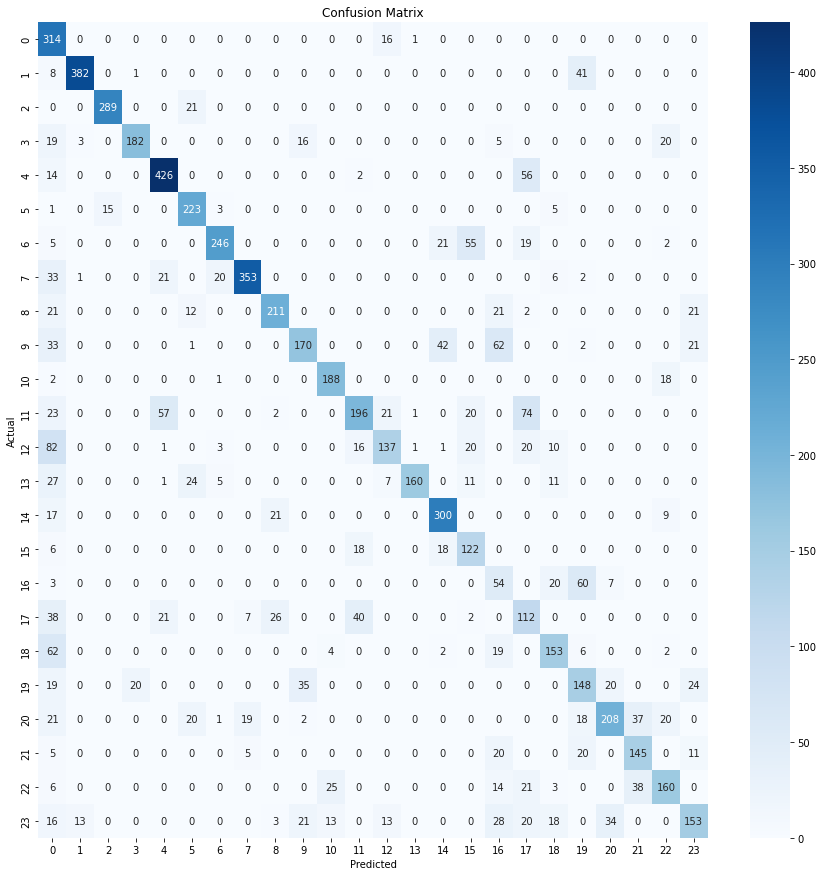

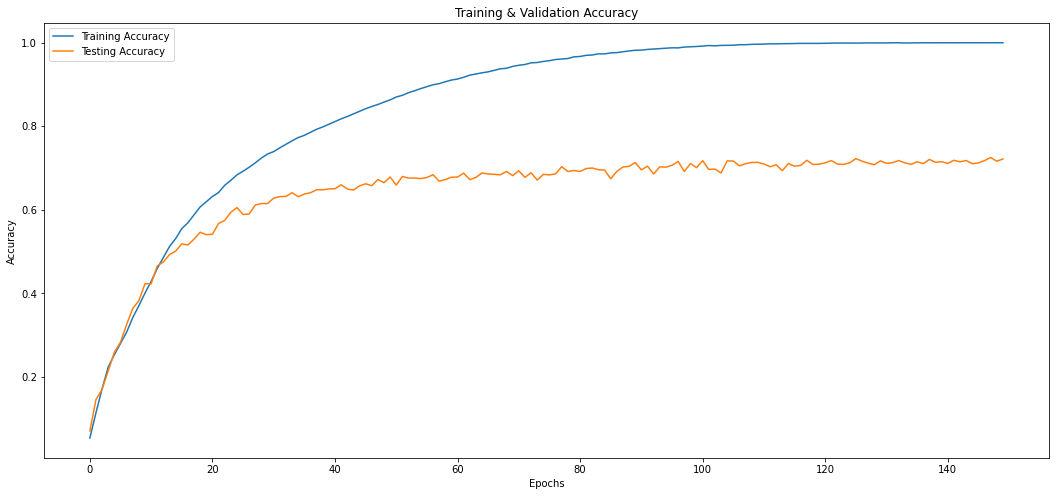

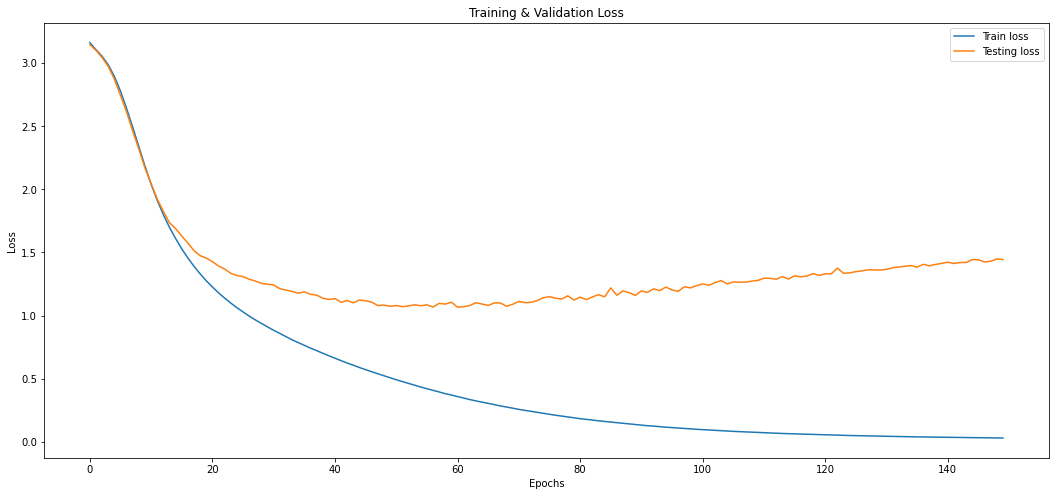

In [11]:
# Predict test data and save model plots and performance plots
y_pred = model.predict(X_test)
utils.save_results(np.argmax(test_labels,axis=1),np.argmax(y_pred.round(),axis=1), "ANN")
utils.save_model_history(history,"ANN")

In [12]:
# Save the model
pickle.dump(model,open("./models/ann.hd5","wb"))

INFO:tensorflow:Assets written to: ram://91cdf33b-b4b0-48b4-9d9d-b231d0229895/assets


## CNN Models

In [8]:
# Modify data to feed into model
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_dev = X_dev.reshape(X_dev.shape[0], 28, 28, 1)

In [9]:
# Basic setup for models
batch_size = 128
num_classes = 24 # J and Z are missing
epochs = 15

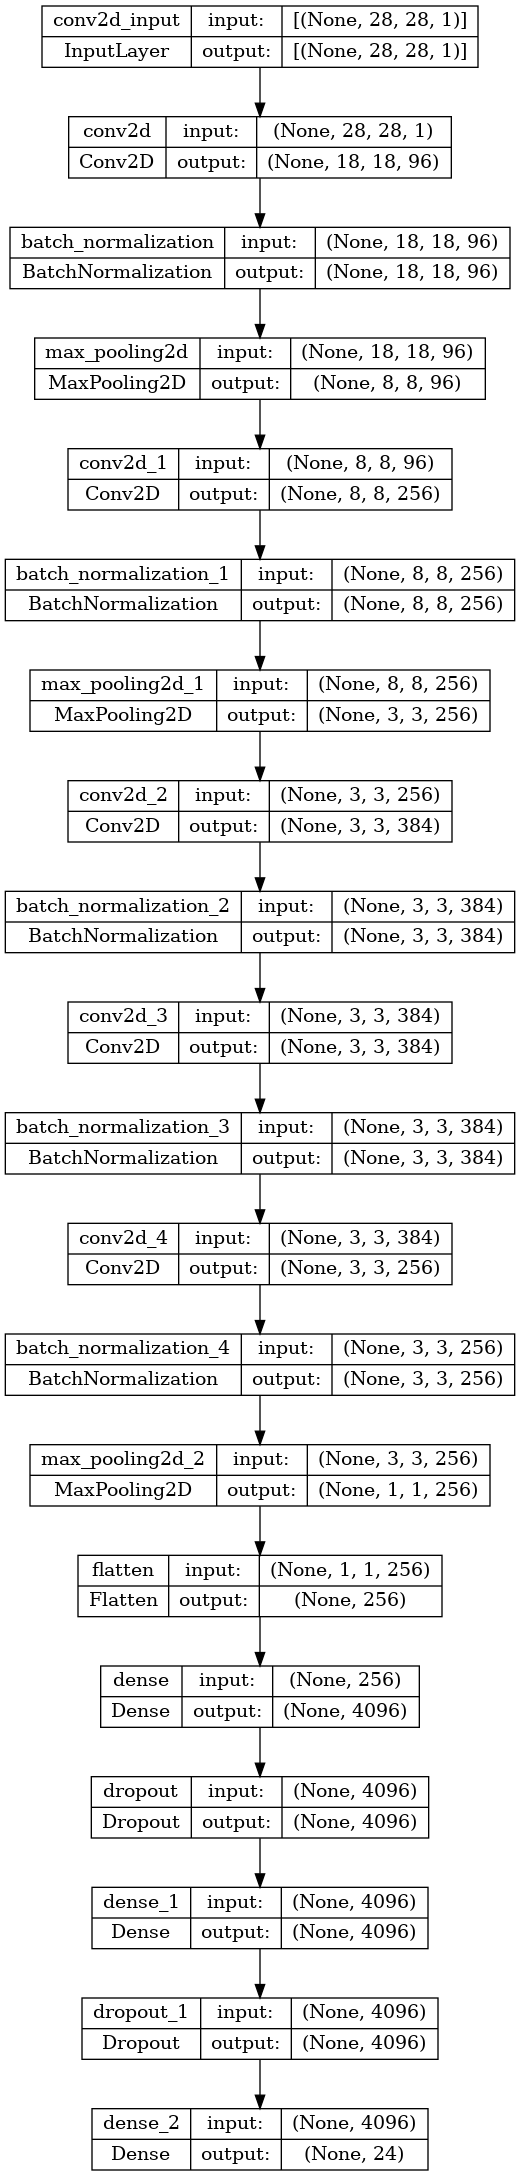

In [10]:
# Compile and train the model
epochs = 40
alexNet = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(1,1), activation='relu', input_shape=(28,28,1)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(num_classes, activation='softmax')
])

alexNet.compile(loss="categorical_crossentropy", optimizer="Adam",metrics=['accuracy'])
plot_model(alexNet, to_file='./results/alexNet_model_plot.png', show_shapes=True, show_layer_names=True)

In [11]:
alexNet_history = alexNet.fit(X_train, y_train, validation_data = (X_dev, y_dev), epochs=epochs, batch_size=batch_size)

Epoch 1/40
215/215 [==============================] - 8s 22ms/step - loss: 1.0131 - accuracy: 0.6943 - val_loss: 6.8052 - val_accuracy: 0.0475
Epoch 2/40
215/215 [==============================] - 4s 18ms/step - loss: 0.1180 - accuracy: 0.9656 - val_loss: 3.0024 - val_accuracy: 0.4937
Epoch 3/40
215/215 [==============================] - 4s 18ms/step - loss: 0.0455 - accuracy: 0.9873 - val_loss: 2.7719 - val_accuracy: 0.4459
Epoch 4/40
215/215 [==============================] - 4s 17ms/step - loss: 0.1244 - accuracy: 0.9722 - val_loss: 5.4329 - val_accuracy: 0.2539
Epoch 5/40
215/215 [==============================] - 4s 17ms/step - loss: 0.0380 - accuracy: 0.9904 - val_loss: 9.9131 - val_accuracy: 0.2899
Epoch 6/40
215/215 [==============================] - 4s 18ms/step - loss: 0.0297 - accuracy: 0.9928 - val_loss: 0.6873 - val_accuracy: 0.8721
Epoch 7/40
215/215 [==============================] - 4s 18ms/step - loss: 0.1042 - accuracy: 0.9817 - val_loss: 2.3481 - val_accuracy: 0.5284

In [12]:
# Predict on test data
y_pred = alexNet.predict(test_images)

225/225 [==============================] - 1s 3ms/step


              precision    recall  f1-score   support

           0       0.53      0.95      0.68       331
           1       0.95      0.93      0.94       432
           2       0.99      0.89      0.94       310
           3       0.96      0.59      0.73       245
           4       0.88      1.00      0.94       498
           5       1.00      0.91      0.96       247
           6       1.00      0.69      0.82       348
           7       0.94      0.89      0.91       436
           8       0.52      1.00      0.69       288
           9       1.00      0.80      0.89       331
          10       1.00      0.93      0.96       209
          11       0.97      0.74      0.84       394
          12       0.79      0.82      0.80       291
          13       1.00      0.83      0.91       246
          14       0.93      0.85      0.89       347
          15       1.00      0.99      0.99       164
          16       0.77      0.86      0.81       144
          17       1.00    

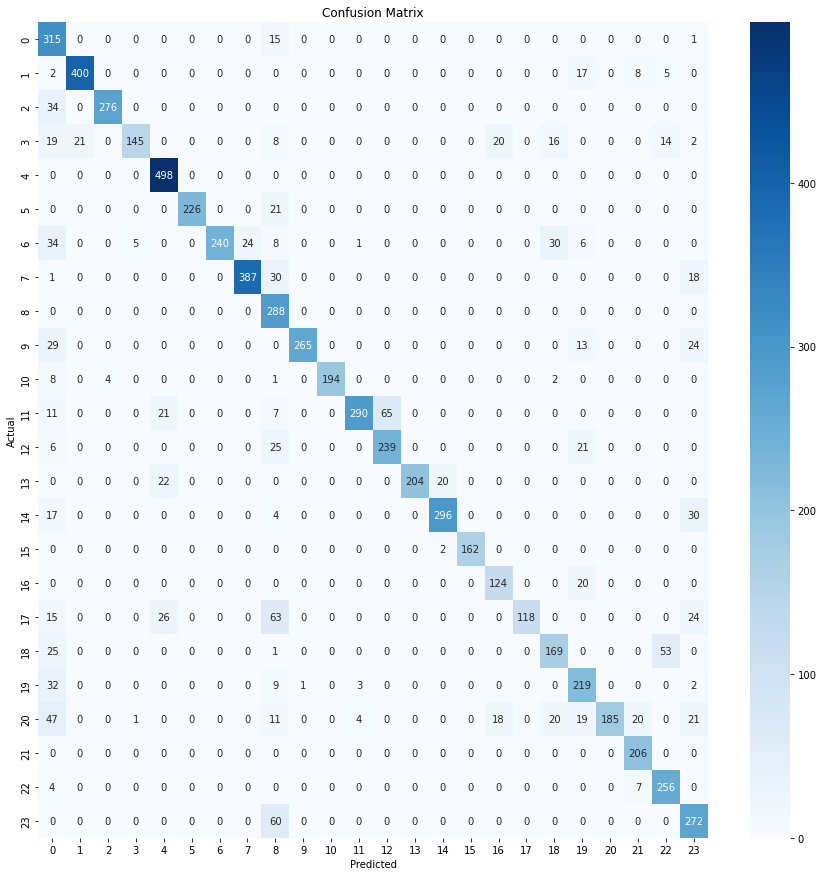

In [13]:
utils.save_results(np.argmax(test_labels,axis=1),np.argmax(y_pred.round(),axis=1), "alexnet")

In [14]:
pickle.dump(alexNet,open("./models/alexNet.hd5","wb"))

INFO:tensorflow:Assets written to: ram://08343201-8465-4e60-a433-ba902c212393/assets


INFO:tensorflow:Assets written to: ram://08343201-8465-4e60-a433-ba902c212393/assets


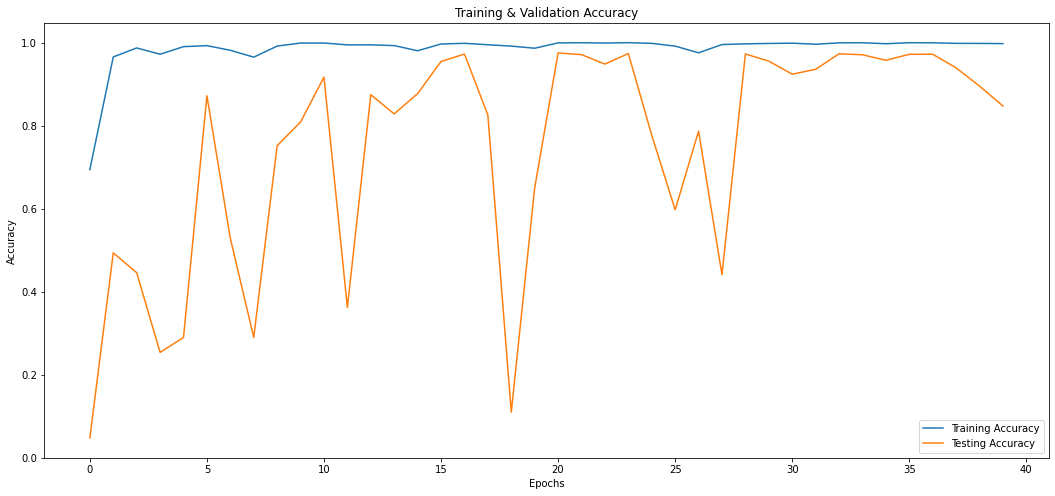

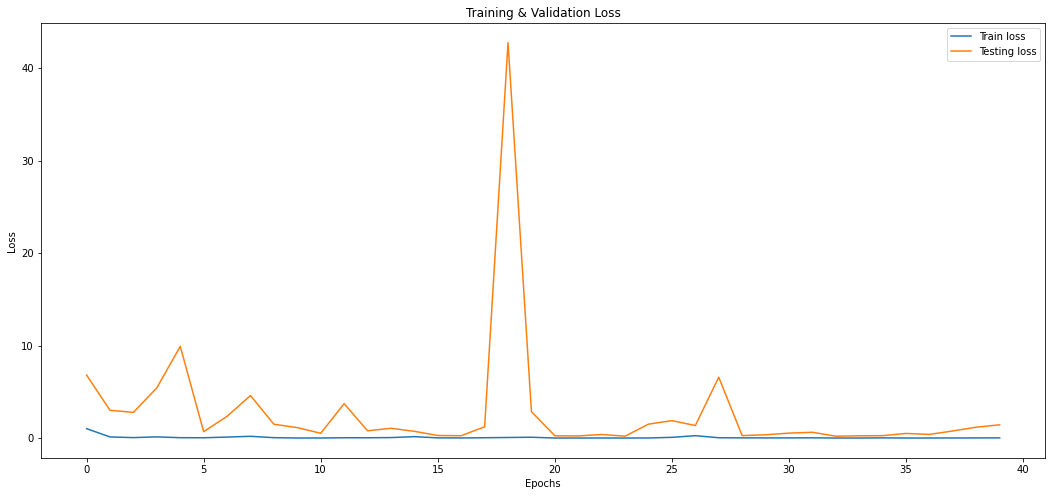

In [15]:
utils.save_model_history(alexNet_history, "alexnet")

# Own CNN model

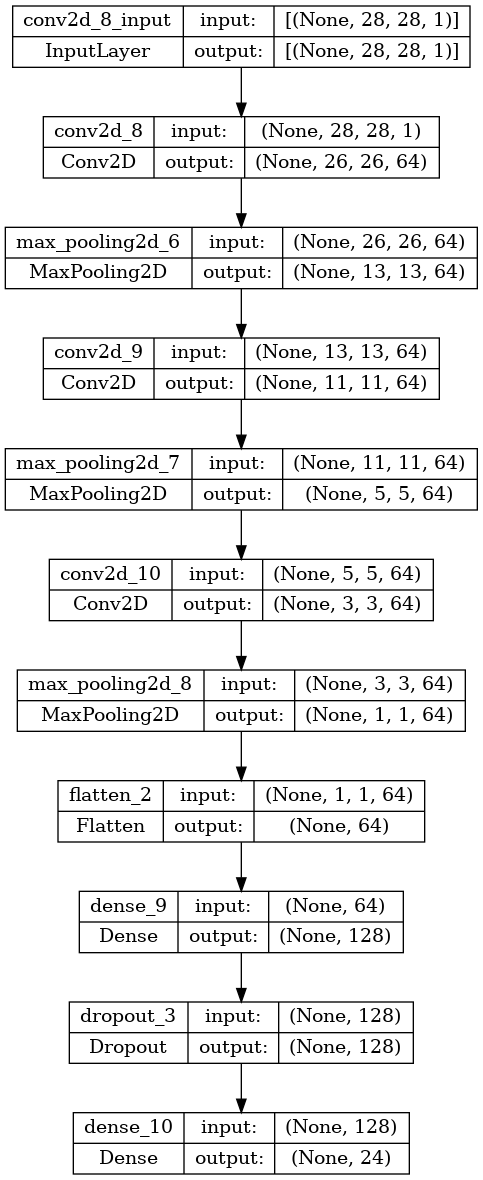

In [25]:
# Simple CNN model using Keras APIs
epochs = 20
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))

model.add(Dense(num_classes, activation = 'softmax'))
model.compile(loss="categorical_crossentropy", optimizer="Adam",metrics=['accuracy'])
plot_model(model, to_file='./results/cnn1_model_plot.png', show_shapes=True, show_layer_names=True)

In [26]:
cnn_history = model.fit(X_train, y_train, validation_data = (X_dev, y_dev), epochs=epochs, batch_size=batch_size)

Epoch 1/20
215/215 [==============================] - 2s 6ms/step - loss: 2.2553 - accuracy: 0.3009 - val_loss: 1.1953 - val_accuracy: 0.6042
Epoch 2/20
215/215 [==============================] - 1s 6ms/step - loss: 0.8906 - accuracy: 0.6950 - val_loss: 0.8147 - val_accuracy: 0.7167
Epoch 3/20
215/215 [==============================] - 1s 7ms/step - loss: 0.5196 - accuracy: 0.8237 - val_loss: 0.5698 - val_accuracy: 0.7981
Epoch 4/20
215/215 [==============================] - 1s 7ms/step - loss: 0.2992 - accuracy: 0.9020 - val_loss: 0.4301 - val_accuracy: 0.8508
Epoch 5/20
215/215 [==============================] - 1s 7ms/step - loss: 0.1769 - accuracy: 0.9462 - val_loss: 0.3862 - val_accuracy: 0.8735
Epoch 6/20
215/215 [==============================] - 1s 6ms/step - loss: 0.1102 - accuracy: 0.9689 - val_loss: 0.4183 - val_accuracy: 0.8692
Epoch 7/20
215/215 [==============================] - 1s 6ms/step - loss: 0.0717 - accuracy: 0.9807 - val_loss: 0.3611 - val_accuracy: 0.8862
Epoch 

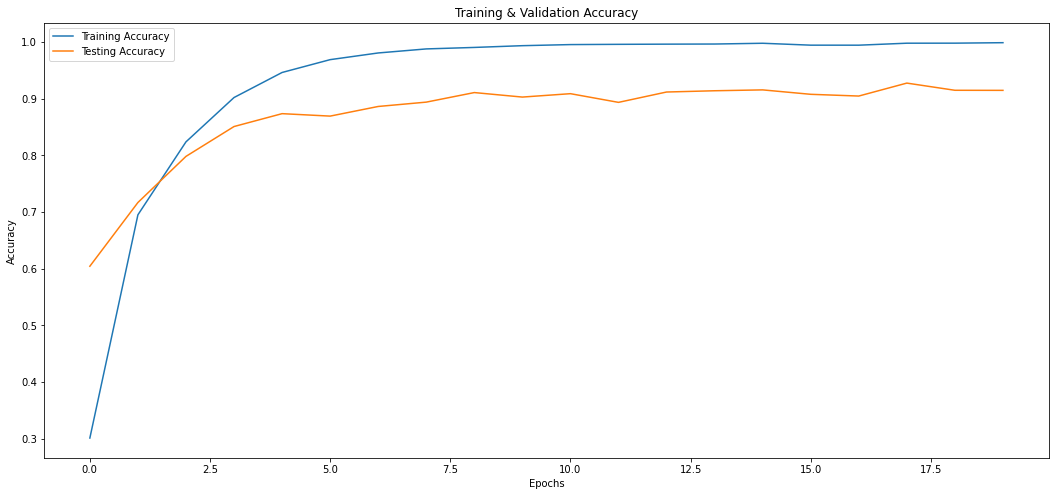

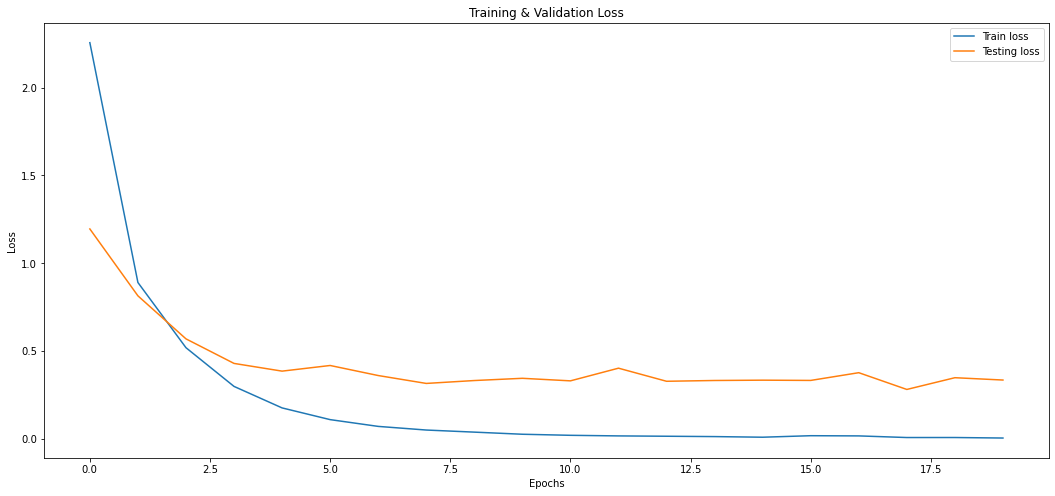

In [27]:
utils.save_model_history(cnn_history, "cnn1_model")

In [28]:
model_path = "./models/cnn1_model.hd5"

In [29]:
pickle.dump(model,open(model_path,"wb"))

INFO:tensorflow:Assets written to: ram://5cedf486-a088-4e68-a0db-2c881c4a84a8/assets


INFO:tensorflow:Assets written to: ram://5cedf486-a088-4e68-a0db-2c881c4a84a8/assets


225/225 [==============================] - 0s 835us/step
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       331
           1       1.00      0.99      1.00       432
           2       0.92      0.88      0.90       310
           3       0.94      0.96      0.95       245
           4       0.92      1.00      0.96       498
           5       1.00      1.00      1.00       247
           6       0.92      0.70      0.80       348
           7       0.86      0.94      0.90       436
           8       0.87      1.00      0.93       288
           9       0.96      0.96      0.96       331
          10       0.88      0.89      0.88       209
          11       0.98      0.94      0.96       394
          12       1.00      0.95      0.97       291
          13       0.84      0.81      0.83       246
          14       1.00      0.99      0.99       347
          15       0.93      1.00      0.96       164
          16       0.75 

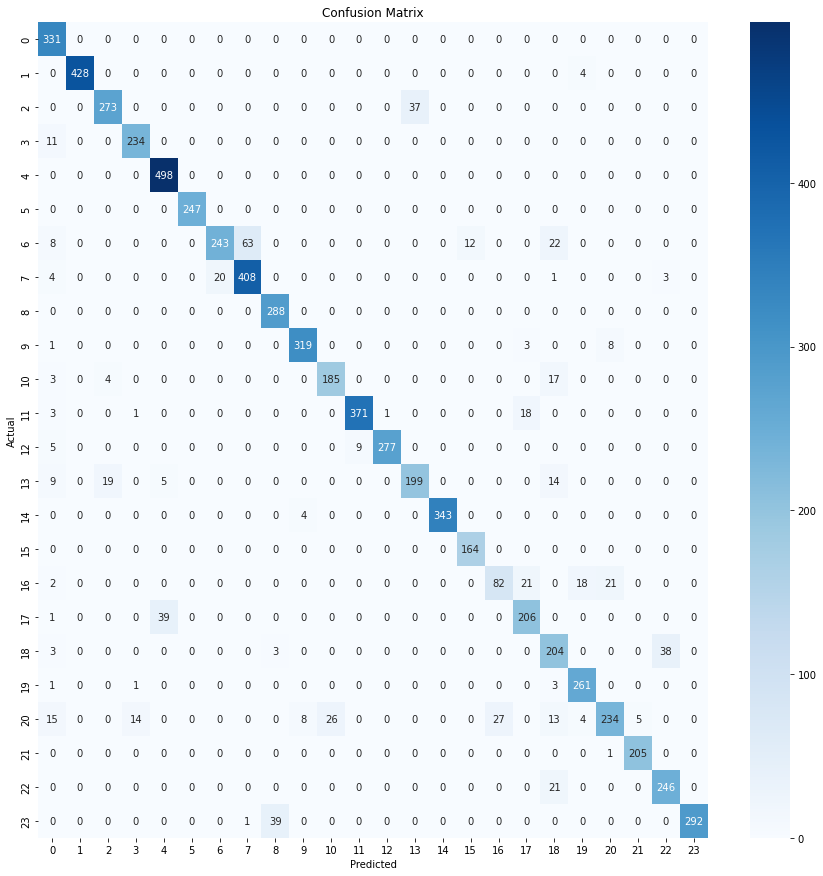

In [30]:
import pickle
load_model = pickle.load(open(model_path,"rb"))
y_pred = load_model.predict(test_images)
utils.save_results(np.argmax(test_labels,axis=1),np.argmax(y_pred.round(),axis=1), "cnn1_model")
#utils.save_results(test_labels, result.round())